# Исследование объявлений о продаже квартир
Предоставлены данные сервиса по продаже недвижимости - архив объявлений о продаже квартир в регионе. На основе эитих данных необходимо установить параметры, по котором можно было бы автоматически определять рыночную стоимость объекта, а также выявлять аномалии и мошенническую деятельность.

По каждому объекту предоставлено 2 вида даных - это выбранные пользователем (количество комнат, адрес, площадь и т.д) и полученные автоматически на основе картографических данных (расстояние до центра, метро или парка).

# Цель
- Добавить ряд необходимых параметров по имеющимся данным
- Определить на сколько влияют различные параметры на цену и скорость продажи объекта
- Рассмотреть влияние на различне параметр удаленности объектов от центра города

# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


## 1. Изучение данных из файла

Прочитаем данные, изучим общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

try:
    df = pd.read_csv('E:/Python/Project 2/real_estate_data.csv', sep='\t', decimal='.') 
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В предосталенных данных таблица на более чем 23 тыс. строк и 22 колонки. Данные требуют тщательной предобработки с пропущенными значениями, проверкой дубликатов и приведением к нужным типам.

## 2. Предобработка данных
### 2.1 Обработка пропусков

Проверим наличие пропусков и обработаем те колонки, где это уместно.

In [3]:
df.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обработаем пропуски в следующих столбцах: `locality_name`, `balcony`, `floors_total`.

В столбце `locality_name` менее 0,5% пропусков, но этот параметр является одним из ключевых в исследовании. Поэтому целесообразно удалить строки с пропусками в данном столбце. Причиной появления пропусков в данном столбце могло быть, что человек не указал населенный пункт, либо если это невозможно по алгоритму, то мог прозойти сбой при выгрузке данных.

In [4]:
#df.dropna(subset=['locality_name'], inplace=True)
df =df.dropna(subset=['locality_name'])

Столбец `balcony`содержит около 50% пропусков. Но, мы можем предположить, что если человек не указал количество балконов, значит их нет. Соответсвенно заменим пропуски на 0.

In [5]:
df['balcony'] = df['balcony'].fillna(0)

Столбец `floors_total` содержит 86 пропусков, это немного, но удалять строки с пропусками мы не будем, так как в остальных столбцах могут содержаться полезные данные. Также присваивать какие либо значения также некорректно, т.к. это может сильно повлиять на дальнейший анализ (например последние этажи продаются гораздо хуже остальных. Поэтому заменем на условное значение 0. Причиной появления пропусков в данном столбце могло быть, что человек не указал населенный пункт, либо если это невозможно по алгоритму, то мог прозойти сбой при выгрузке данных.

In [6]:
df['floors_total'] = df['floors_total'].fillna(0)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

### 2.2 Приведение данных к нужным типам

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Следующие столбцы требуют замены типа данных:
- `first_day_exposition` необходимо перевести в дату
- `floors_total` необходимо перевести в int, т.к. количество этажей может быть только целым
- `balcony` необходимо перевести в int, т.к. количество балконов может быть только целым

In [8]:
# Создадим новый столбец, где будет только дата, т.к. время нас не интересует.
df['date_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

df['floors_total'] = df['floors_total'].astype('int')

df['balcony'] = df['balcony'].astype('int')
df['balcony'].value_counts()
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,2017-03-21
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018-01-15
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-11
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,2017-03-28


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int32
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int32
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000   

### Вывод

Были обработаны пропуски в столбцах `locality_name`, `balcony`, `floors_total`, а также заменены типы данных в `first_day_exposition`, `balcony`, `floors_total`. Теперь данные готовы к работе.

## 3. Расчёты и добавление результатов в таблицу
Цена квадратного метра:

In [10]:
df['area_price'] = df['last_price']/df['total_area']

День недели, месяц и год публикации объявления:

In [11]:
df['weekday'] =  df['date_exposition'].dt.weekday 
df['month'] =  df['date_exposition'].dt.month 
df['weekday'] =  df['date_exposition'].dt.weekday 
df['year'] =  df['date_exposition'].dt.year 

Этаж квартиры; варианты — первый, последний, другой:

In [12]:
# Т.К. для пропущенных значений столбца floors_total были применены 0, введем доп. категорию 'Не определить'
def category_flow (data):
    if data['floor'] == 1:
        return 'первый'
    if data['floors_total'] != 0:
        if data['floor'] == data['floors_total']:
            return 'последний'
        return 'другой' 
    return 'Не определить'

df['category_flow'] = df.apply(category_flow, axis = 1)
df['category_flow'].value_counts()

другой           17326
последний         3330
первый            2912
Не определить       82
Name: category_flow, dtype: int64

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [13]:
df['p_living'] = df['living_area']/df['total_area']
df['p_kitchen'] = df['kitchen_area']/df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_exposition,area_price,weekday,month,year,category_flow,p_living,p_kitchen
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,755.0,NaN,2019-03-07,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,NaN,81.0,2018-12-04,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,574.0,558.0,2015-08-20,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,234.0,424.0,2015-07-24,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,48.0,121.0,2018-06-19,100000.000000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,...,381.0,NaN,2017-03-21,72490.845228,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,NaN,45.0,2018-01-15,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,NaN,NaN,2018-02-11,44091.710758,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,196.0,602.0,2017-03-28,149511.400651,1,3,2017,другой,NaN,0.303583


### Вывод

Для удобсва дальнейшего анализа данных были добавлены следующие столбцы: 
- Цена квадратного метра 
- День недели, месяц и год публикации объявления 
- Этаж квартиры; варианты — первый, последний, другой
- Соотношение жилой и общей площади, а также отношение площади кухни к общей

Это позволит более тщательно провести анализ.

## 4. Исследовательский анализ данных

#### 4.1 Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

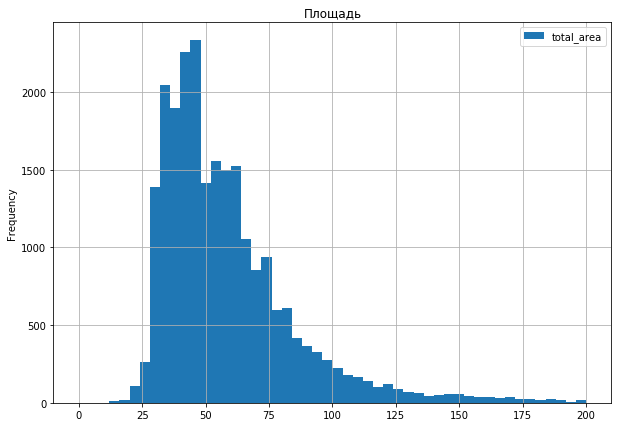

In [14]:
df['total_area'].plot(
    kind = 'hist',
    range=(0,200),
    bins=50,
    grid = True,
    legend = True,
    figsize=(10,7),
    title = 'Площадь'
)

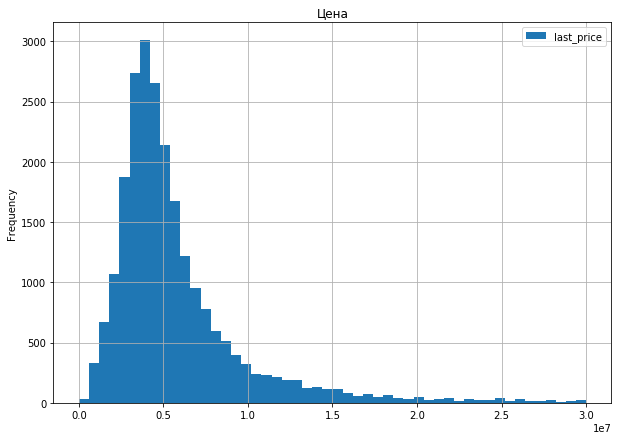

In [15]:
df['last_price'].plot(
    kind = 'hist',
    range=(0,30000000),
    bins=50,
    grid = True,
    legend = True,
    figsize=(10,7),
    title = 'Цена'
)

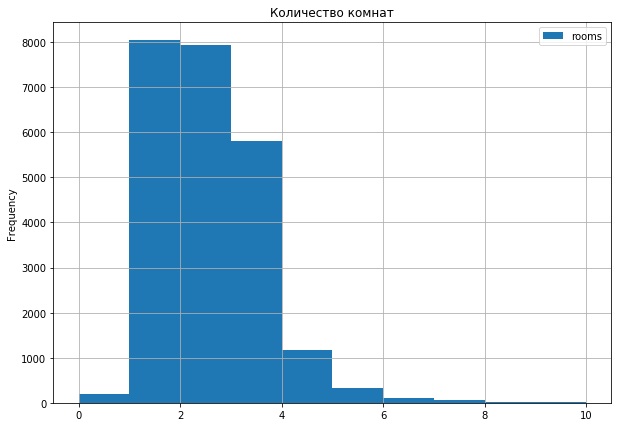

In [16]:
df['rooms'].plot(
    kind = 'hist',
    range=(0,10),
    bins=10,
    grid = True,
    legend = True,
    figsize=(10,7),
    title = 'Количество комнат'
)

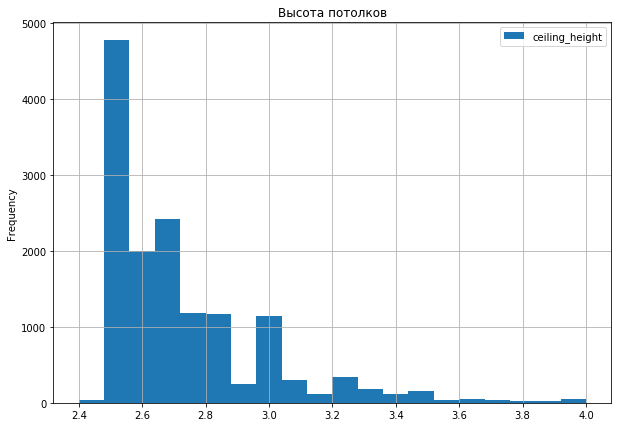

In [17]:
df['ceiling_height'].plot(
    kind = 'hist',
    range=(2.4, 4),
    bins=20,
    grid = True,
    legend = True,
    figsize=(10,7),
    title = 'Высота потолков'
)

#### Вывод: 
- Площадь имеет несколько пиков, первый  около 35, далее примерно такойже по величине около 45 и чуть меньше около 60 кв м. По всей видимости это совпадает со стандартными площадами для 1, 2 и 3 контатных квартир.
- В цене ярко выражено распределение Пуассона с пиком около 4 млн.
- Распределение по количеству комнат совпадает с площадью. Наиболее распространены 1 и 2ух комнатные,далее 3 комнатные и 4 комнатные. Остальных вариантов крайне мало
- Высота потолков имеет вид распределения Пуассона, с пиком в 2.5 метра

#### 4.2 Изучим время продажи квартиры. Посчитаем среднее и медиану. 

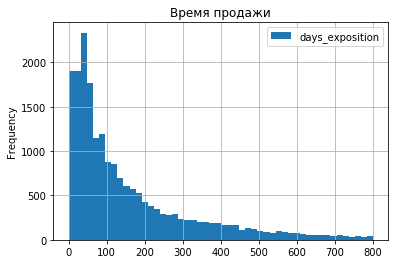

In [18]:
df['days_exposition'].plot(
    kind = 'hist',
    range=(0, 800),
    bins=50,
    grid = True,
    legend = True,
    title = 'Время продажи'
)

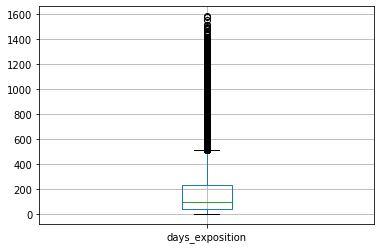

In [19]:
df.boxplot(column='days_exposition')
plt.show()

In [20]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Вывод:
- Среднее время продажи квартиры 181 день
- Медианное время продажи квартиры 95 дней

Исходя из полученных данных: 
- Обычно продажа квартиры занимет от 45 до 231 дня 
- Очень быстрой является продажа за несколько дней, хотя и это не является редкостью
- Довольно быстрой считается продажа до 45 дней 
- Долгой считается продажа от 231 дня до 510 дней 
- Очень долгой будет продажа, которая длится более 510 дней.

#### 4.3 Уберем редкие и выбивающиеся значения.

Обработаем наиболее важные столбцы: стоимость, площадь и количество комнат.

In [21]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [22]:
#Определим нижнюю и верхнюю границу вбросов
min_norma_price = 3.400000e+06 - 1.5*(6.799000e+06 - 3.400000e+06)
max_norma_price = 6.799000e+06 + 1.5*(6.799000e+06 - 3.400000e+06)
min_norma_price, max_norma_price

(-1698500.0, 11897500.0)

- Видим, что нижняя граница уходит в отрицательные значения, будем считать, что вбросов по нижней границе нет. 
- По верхней границе, все что более 11897500.0 будет считаться вбросами и подлежит удалению


In [23]:
good_df = df.query('last_price < @max_norma_price')
good_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_exposition,area_price,weekday,month,year,category_flow,p_living,p_kitchen
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,NaN,81.0,2018-12-04,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,574.0,558.0,2015-08-20,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,48.0,121.0,2018-06-19,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.4,5,NaN,...,NaN,55.0,2018-09-10,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.6,6,NaN,...,NaN,155.0,2017-11-02,99195.710456,3,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,...,381.0,NaN,2017-03-21,72490.845228,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,NaN,45.0,2018-01-15,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,NaN,NaN,2018-02-11,44091.710758,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,196.0,602.0,2017-03-28,149511.400651,1,3,2017,другой,NaN,0.303583


In [24]:
#Определим нижнюю и верхнюю границу вбросов по площади
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [25]:
min_norma_area = 40 - 1.5*(69.7 - 40)
max_norma_area = 69.7 + 1.5*(69.7 - 40)
min_norma_area, max_norma_area

(-4.550000000000004, 114.25)

- Видим, что нижняя граница уходит в отрицательные значения, будем считать, что вбросов по нижней границе нет. 
- По верхней границе, все что более 114.25 будет считаться вбросами и подлежит удалению

In [26]:
good_df = good_df.query('total_area < @max_norma_area')
good_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_exposition,area_price,weekday,month,year,category_flow,p_living,p_kitchen
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,NaN,81.0,2018-12-04,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,574.0,558.0,2015-08-20,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,48.0,121.0,2018-06-19,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.4,5,NaN,...,NaN,55.0,2018-09-10,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.6,6,NaN,...,NaN,155.0,2017-11-02,99195.710456,3,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9,40.0,8,NaN,...,675.0,239.0,2016-08-05,73717.948718,4,8,2016,другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,NaN,45.0,2018-01-15,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,NaN,NaN,2018-02-11,44091.710758,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,196.0,602.0,2017-03-28,149511.400651,1,3,2017,другой,NaN,0.303583


In [27]:
#Определим нижнюю и верхнюю границу вбросов по площади
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [28]:
min_norma_rooms = 1 - 1.5*(3 - 1)
max_norma_rooms = 3 + 1.5*(3 - 1)
min_norma_rooms, max_norma_rooms

(-2.0, 6.0)

- Видим, что нижняя граница уходит в отрицательные значения, будем считать, что вбросов по нижней границе нет. 
- По верхней границе, все что более 6 будет считаться вбросами и подлежит удалению

In [29]:
good_df = good_df.query('rooms < @max_norma_rooms')
good_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_exposition,area_price,weekday,month,year,category_flow,p_living,p_kitchen
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,NaN,81.0,2018-12-04,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,574.0,558.0,2015-08-20,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,48.0,121.0,2018-06-19,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.4,5,NaN,...,NaN,55.0,2018-09-10,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.6,6,NaN,...,NaN,155.0,2017-11-02,99195.710456,3,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9,40.0,8,NaN,...,675.0,239.0,2016-08-05,73717.948718,4,8,2016,другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5,38.0,4,NaN,...,NaN,45.0,2018-01-15,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3,29.7,1,NaN,...,NaN,NaN,2018-02-11,44091.710758,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,NaN,12,NaN,...,196.0,602.0,2017-03-28,149511.400651,1,3,2017,другой,NaN,0.303583


#### Вывод:
- После удаления вбросов по категориям цена, площадь и количетсво комнат, таблица стала меньше примерно на 10%. Все вбросы были взаимосвязаны между собой, т.к. после удаления вбросов по категории цены, вбросы по категориям площади и количество комнат остались минимальны. Это говорит о сильной взяимосвязи данных величин.
- Также вбросы были обнаружены только по верхним границам. Это говорит о высокой концентрации значений в самом начале диапазона. Значит подтверждается, что самое дешевое и маленькое пользется наибольшим спросом и популярностью.

#### 4.4 Определяем, какие факторы больше всего влияют на стоимость квартиры? 
Проанализируем коэффициент корреляции Пирсона.

In [30]:
#Для площади
good_df['last_price'].corr(good_df['total_area'])

0.6937353701358703

In [31]:
#Для количества комнат
good_df['last_price'].corr(good_df['rooms'])

0.43136522503447033

In [32]:
#Для стоимости кв метра от количества комнат
good_df['area_price'].corr(good_df['rooms'])

-0.2316357552924217

In [33]:
#Для удаленности от центра
good_df['last_price'].corr(good_df['cityCenters_nearest'])

-0.34508287082590844

In [34]:
#Для стоимости кв метра в зависимости от удаленности от центра
good_df['area_price'].corr(good_df['cityCenters_nearest'])

-0.39726678181885455

Зависимость цены от этажа определим по цене квадратного метра в каждой группе:

In [35]:
good_df.groupby('category_flow').median()['area_price']

category_flow
Не определить    99159.987764
другой           96103.896104
первый           80267.766523
последний        84615.384615
Name: area_price, dtype: float64

Также оценим зависимоть цены от даты размещения по цене квартиры и квадратного метра в каждой группе:

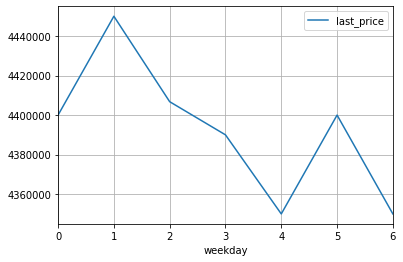

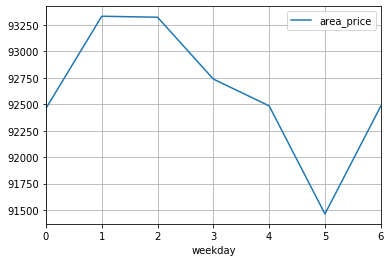

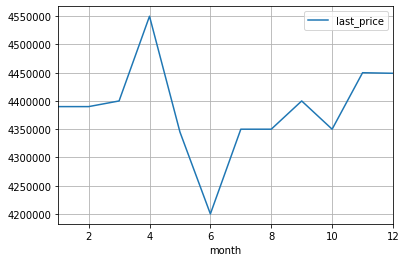

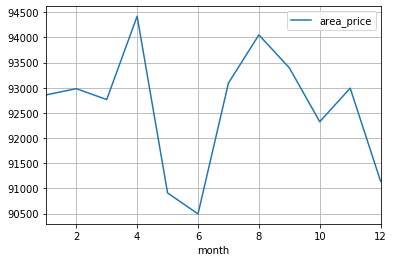

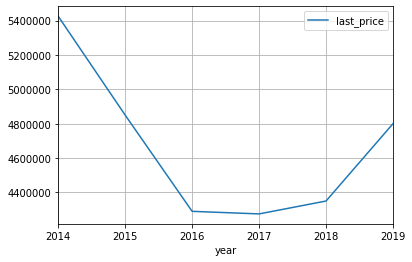

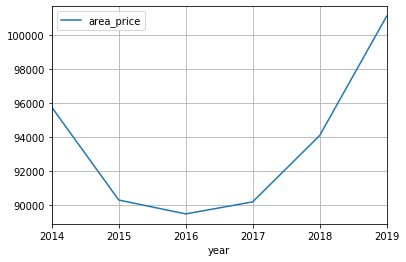

In [36]:
columns = ['weekday', 'month', 'year']

for date in columns:
    good_df.groupby(date).median()['last_price'].plot(grid=True, legend = True)
    plt.show()
    good_df.groupby(date).median()['area_price'].plot(grid=True, legend = True)
    plt.show()


#### Вывод:
- Цена от площади зависит очень сильно, об этом говорит коэф. Пирсона 0,7.
- Цена от количества комнат зависит достаточно сильно, коэф. Пирсона 0,43, но более честное влияние на стоимость жилья покажет зависимость стоимости кв метра от количества комнат, она показывает обратную зависимость, коэф. Пирсона -0,23. Это значит, что чем больше комнат, тем меньше спрос.
- Удаленность от центра достаточно влияет на цену квартиры, коэф. Пирсона 0,35, еще более ярко видно влияние на стоимость квадратного метра, коэф. Пирсона 0,4.
- Влияние этажа (первый, последний, другой) на цену недвижимости очень велико. Оценка зависимости медианной стоимость кв метра от этажности показала: менее всего ценят 1ый этаж, на 5% дороже последний этаж и на 20% дороже средние этажи.
- Влияние дня недели на цену квартиры не выявлено, разброс менее 2%.
- Влияние месяца на цену квартиры есть, но не значительно, разброс 5%. Наибольшая цена в апреле, наименьшая в июне. Возможно, в апреле многие получают бонусы и премии на работе, от этого и повышенный спрос, но это не точно.
- Зависимость цены от года продажи явно просматривается, с 2014 по 2016 обнаружено резкое падение около 20%, далее постепенный рост, который до 2019 не отыграл и 10%. Однако стоимость квадратного метра показывает картину немного иначе: падение было около 5% и далее такой же быстрый и стремительный рост, который к 2019 отыграл и даже увеличил стоимсоть на 5%, по сравнению с 2014. Видимо сказывается влияние кризиса, инфляции и реальных доходов населения. Покупают квартиры все меньшей площади, они в общем дешевле, но цена квадратного метра больше.

#### 4.5 Проанализируем 10 населённых пунктов с наибольшим числом объявлений. 

In [37]:
top_10_grad = good_df['locality_name'].value_counts().head(10)
top_10 = good_df.pivot_table(index = 'locality_name', values = 'area_price', aggfunc = 'mean' )
top_10.query('locality_name in @top_10_grad.index').sort_values(by='area_price')

,area_price
locality_name,
Выборг,58225.624357
Всеволожск,67222.431462
Гатчина,68664.035870
Колпино,75221.876295
посёлок Шушары,78704.891847
посёлок Мурино,85752.189195
посёлок Парголово,90332.263023
деревня Кудрово,92409.726322
Пушкин,100552.651855


#### Вывод: 
Среди топ 10 городов с наибольшим количеством объявлений самымая высокая стоимость кв метра жилья в Санкт-Петербурге 105689. Самымая низкая стоимость жилья в Выборге, стоимость квадратного метра 58255.

#### 4.6 Определяем зону центра для Санкт-Петербурга.

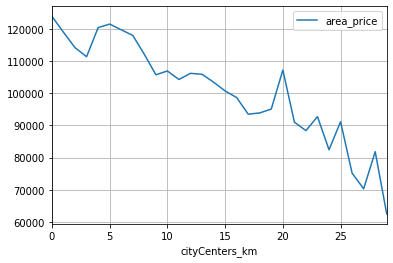

In [38]:
df_spb = good_df[df['locality_name'] == 'Санкт-Петербург']
df_spb['cityCenters_km'] = df_spb['cityCenters_nearest']/1000
df_spb.dropna(subset=['cityCenters_km'],inplace=True)
df_spb['cityCenters_km'] = df_spb['cityCenters_km'].astype('int')
spb_km_price = df_spb.pivot_table(index = 'cityCenters_km', values = 'area_price', aggfunc = 'mean' )
spb_km_price.plot(grid=True)

#### Ответ: 
График показывает, что цена квадратного метра сильно изменяется на 9-ом километре от центра. Значит, будем считать центром города границу 8км.

#### 4.7 Проанализируем объявления в зоне центра.

In [39]:
spb_center = df_spb[df_spb['cityCenters_km'] < 9]

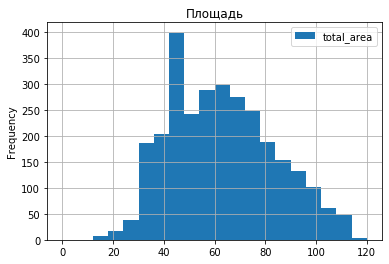

In [40]:
spb_center['total_area'].plot(
    kind = 'hist',
    range=(0,120),
    bins=20,
    grid = True,
    legend = True,
    title = 'Площадь'
)

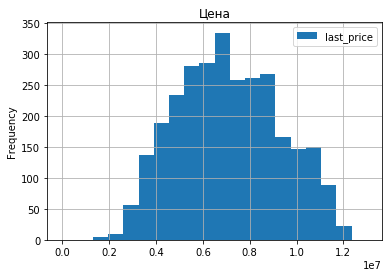

In [41]:
spb_center['last_price'].plot(
    kind = 'hist',
    range=(0,13000000),
    bins=20,
    grid = True,
    legend = True,
    title = 'Цена'
)

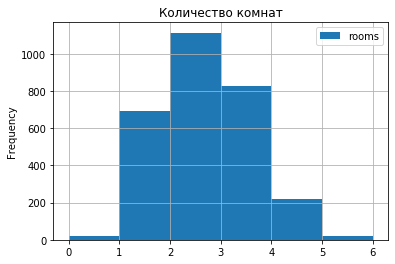

In [42]:
spb_center['rooms'].plot(
    kind = 'hist',
    range=(0,6),
    bins=6,
    grid = True,
    legend = True,
    title = 'Количество комнат'
)

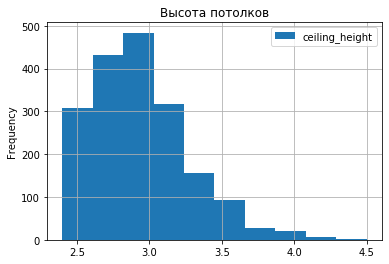

In [43]:
spb_center['ceiling_height'].plot(
    kind = 'hist',
    range=(2.4, 4.5),
    bins=10,
    grid = True,
    legend = True,
    title = 'Высота потолков'
)

Определение факторов влияющих на стоимость:

In [44]:
#Для стоимости кв метра от количества комнат
spb_center['area_price'].corr(good_df['rooms'])

-0.48118855783828723

In [45]:
#Для категории этажа
spb_center.groupby('category_flow').median()['area_price']

category_flow
Не определить    119705.340700
другой           116444.249342
первый           102167.182663
последний        107258.743709
Name: area_price, dtype: float64

In [46]:
#Для стоимости кв метра в зависимости от удаленности от центра
spb_center['area_price'].corr(good_df['cityCenters_nearest'])

-0.03335824839992506

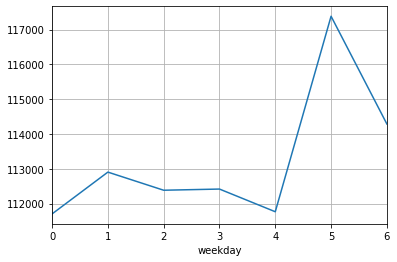

In [47]:
spb_center.groupby('weekday').median()['area_price'].plot(grid=True)

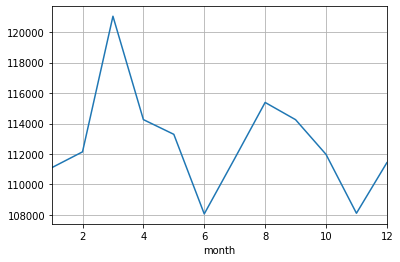

In [48]:
spb_center.groupby('month').median()['area_price'].plot(grid=True)

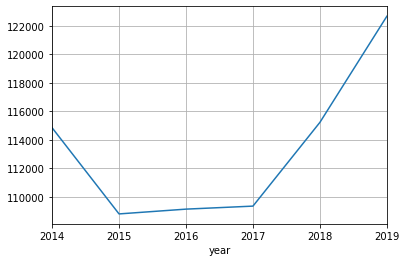

In [49]:
spb_center.groupby('year').median()['area_price'].plot(grid=True)

#### Вывод: 
- Площадь имеет несколько пиков, первый наименьший около 35, далее максимальный около 45 и чуть меньше около 60 кв м. По всей видимости это совпадает со стандартными площадами для 1, 2 и 3 контатных квартир. Для остальных регионоа величины на 35 и 45 примерно равны.
- В цене ярко выражено нормальное распределение с пиком около 7 млн.
- Распределение по количеству комнат совпадает с площадью. Наиболее распространены 2ух комнатные, далее 1 комнатные, 3 комнатные и 4 комнатные. Остальных вариантов крайне мало. Для остальных регионов замечено равное распределение между 1 и 2 комнатными.
- Высота потолков имеет вид распределения Пуассона, с пиком в 2.9 метра, в то время как для остальных регионов пик приходится на 2.5 метра.
- Цена  кв метра от количества комнат зависит достаточно сильно , коэф. Пирсона -0,48, для всех остальных регионов коэф. Пирсона -0,23. Это значит, что чем больше комнат, тем меньше спрос и в центре СПБ эта зависимость более ярковыражена.
- Влияние этажа (первый, последний, другой) на цену недвижимости очень велико. Оценка зависимости медианной стоимость кв метра от этажности показала: менее всего ценят 1ый этаж, на 5% дороже последний этаж и на 13% дороже средние этажи. Эта зависимость совпадает с остальной частью городов, но там разница более ярко выражена.
- Удаленность от центра практически не влияет на цену квартиры, коэф. Пирсона -0.03, на то он и центр, что все близко.
- Влияние дня недели на цену квартиры выявлено не значительно, около 4%, с повышением в субботу. Я бы скорее это считал вбросом, нежели закономерностью.
- Влияние месяца на цену квартиры обнаружено, разброс около 11%. Наибольшая цена в марте, наименьшая в июне. тенденция совпадает с остальными регионами.
- Зависимость цены от года продажи явно просматривается, с 2014 по 2015 обнаружено  падение около 5%, далее плато до 2017 и  постепенный рост, который до 2019 отыграл и увеличил стоимсоть на 5%. Эта картина также совпадает с остальными регионами.


## Общий вывод

В результате анализа выявлены следующие закономерности:
- Наиболее распространены квартиры 1 и 2 комнатные, площадью 35-45 кв метров
- Обычно продажа квартиры занимет от 45 до 231 дня, медиана 95 дней
- Наиболее распространены маленькие и недорогие квартиры
- Больше всего на стоимость жилья влияет площадь. Чуть меньше удаленность от центра и этаж.
- Из наиболее распространенных городов, наибольшая стоимостьв Санкт-Петербурге стоимость кв метра 105689. Самымая низкая в Выборге -  58255.
- Зона центра в Санк-Петербурге ограничена радиусом 8км.
- В центре Санкт-Петербурга квартиры отличаются своим уровнем от остальных (площадь, количество комнат и высота потолков), но общие закономерности, влияющие на цену примерно такие же, как и везде.